In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

class KMeans:
    
    def __init__(self, n_clusters=2, tol=0.001, max_iter=500):
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter
        self.data = None
 
    def fit(self,data):
#         data = data.to_numpy() # uncomment to transform the data to NumPy array if the input is a DataFrame
        self.data = data
    
        x_min = self.data[:,0].min() 
        x_max = self.data[:,0].max() 
        y_min = self.data[:,1].min() 
        y_max = self.data[:,1].max() 
        
        random_centroids = [] 

        for i in range(self.n_clusters):
            # initialise the centroids to a random point in the input data range
            random_centroids.append([random.uniform(x_min, x_max),random.uniform(y_min, y_max)])
            self.centroids = np.array(random_centroids)

        for iteration in range(self.max_iter):
            self.labels = np.array([])

            for row in self.data:    
                # calculate the Euclidian distance between every centroid a data point
                distances = [np.linalg.norm(row-self.centroids[centroid]) for centroid in range(self.n_clusters)]
                # identify for which centroid this distance is minimal
                cluster_id = distances.index(min(distances))
                # assign the respective centroid label to the data point
                self.labels = np.append(self.labels,[cluster_id])

            # save the centroid position coordinates
            prev_centroids = np.copy(self.centroids)
            
#                ### Uncomment to plot algorithm convergence at each iteration
#             sns.scatterplot(x=self.data[:,0], y=self.data[:,1], hue=self.labels, legend=False, size=5, palette='tab20')
#             plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='o', s=30, linewidths=8, color='k', zorder=10, alpha=0.9)
#             plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', s=50, linewidths=50, color='w', zorder=11, alpha=1)
#             plt.show()    
#                ### 

            for i in range(self.n_clusters):
                # update centroids to mean values of cluster data points
                self.centroids[i] = np.average(self.data[self.labels == i],axis=0)
                  
            stop_update = False
        
            for c in range(self.n_clusters):
                # compare centroid 'movement' and interrupt the algorithm if the centroids converged
                if abs(round(np.sum(self.centroids[c]-prev_centroids[c]),3)) < self.tol:
                    stop_update = True
                    break
            
            if stop_update:
                print(f'The algorithm converged after {iteration} iterations.')
                break

    def predict(self,data_list):
        # check the Euclidian distance between the input data point and each centroid
        distances = [np.linalg.norm(data_list-self.centroids[centroid]) for centroid in range(self.n_clusters)]
        # predict cluster 
        cluster = distances.index(min(distances))
        return cluster
    
    def inertia(self):
        inertia = 0
        # calculate the sum of squared distances of samples to their closest cluster center
        for cluster in range(self.n_clusters):
            for feature in self.data[self.labels == cluster]:
                inertia += np.linalg.norm(feature-self.centroids[cluster])
        return inertia
    
    def plot_graph(self):   
        sns.scatterplot(x=self.data[:,0], y=self.data[:,1], hue=self.labels, legend=False, size=5, palette='tab20')
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='o', s=30, linewidths=8, color='k', zorder=10, alpha=0.9)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', s=50, linewidths=50, color='w', zorder=11, alpha=1)
        plt.show()   

Now, we can test the class on generated isotropic Gaussian blobs for clustering with `make_blobs`

In [5]:
from sklearn.datasets import make_blobs

X_blob, y_blob = make_blobs(n_samples=100, centers=2, random_state=3)

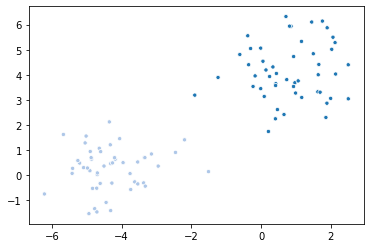

In [6]:
sns.scatterplot(x=X_blob[:,0], y=X_blob[:,1], hue=y_blob, size=5, legend=False, palette='tab20')
plt.show()

Fit the class on the dataset 

In [66]:
kmeans_clf = KMeans(n_clusters=2)
kmeans_clf.fit(X_blob)

The algorithm converged after 2 iterations.


In [58]:
y_pred = kmeans_clf.predict([-4, 0])
print(f'Data point belongs to cluster {y_pred}')

Data point belongs to cluster 0


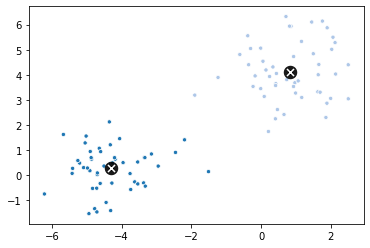

In [60]:
kmeans_clf.plot_graph()

Check the optimal number of cluster for the data set by plotting the 'Elbow' graph

In [ ]:
inertias = []
for k in range(1, 6):
    model = KMeans(n_clusters=k)
    model.fit(X_blob)
    model_inertia = model.inertia()
    inertias.append(model_inertia)

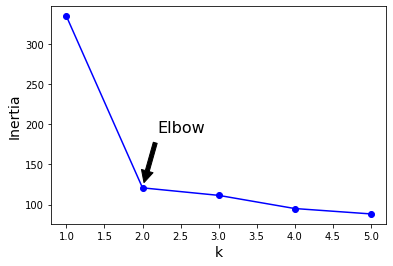

In [70]:
plt.plot(range(1, 6), inertias, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.4, 0.5),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()